In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [3]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from gensim.models import KeyedVectors

In [4]:
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [5]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [6]:
positive_reviews = reviews_df['Positive_Review'].apply(clean)
negative_reviews = reviews_df['Negative_Review'].apply(clean)

In [7]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

In [8]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [9]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [10]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [11]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [12]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [13]:
training_reviews[:10]

[' couldn t contact hotel prior to check in check in poor despite being  months pregnant there was no offer to carry my bags etc wifi didn t work and temperature of the room couldn t be controlled noisy over night ',
 ' central location',
 ' there is no parking at the hotel you need to use public garages do some research to find the cheapest one if you don t mind a   minute walk you should look further out rather than the places directly near the hotel ',
 ' the hotel is in a good location close to the bastille metro station  minute walk this provides quick and easy access to the heart of paris it is also within walking distance of notre dame  minute walk the room was very clean with a comfortable bed also the staff were friendly and we were greeted with a smile the price is very good as well especially after comparing the price with other places on adventures in paris everything you could need for a weekend city break ',
 ' i would have preferred more lighting found it rather dim ',
 

In [14]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(training_reviews)
sequences = tokenizer.texts_to_sequences(training_reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10944 unique tokens.
Shape of data tensor: (16833, 1000)
Shape of label tensor: (16833, 2)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(data, labels, test_size=0.5, random_state=42)

In [16]:
!wget  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2024-02-28 10:55:48--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.14, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip.20’

wiki-news-300d-1M.v 100%[===================>] 650.22M  56.0MB/s    in 13s     

2024-02-28 10:56:00 (51.5 MB/s) - ‘wiki-news-300d-1M.vec.zip.20’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
replace wiki-news-300d-1M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: wiki-news-300d-1M.vec   

In [17]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False,limit=300 )

In [18]:
import keras

In [19]:
vocabSize = len(word_index) + 1
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(training_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

10945

In [20]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 500
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
print(num_words)
embedding_matrix = np.zeros((vocabSize, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.key_to_index:  # Change made here
        embedding_vector = model_ft[word]
        embedding_vector = np.array(embedding_vector)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)


Preparing embedding matrix.fast text
500
(10945, 300)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten
from keras.initializers import Constant

print('Training model.')

# define the model
model = Sequential()
model.add(Embedding(vocabSize,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

# summarize the model
print(model.summary())

model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,
          validation_data=(x_val, y_val))

Training model.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         3283500   
                                                                 
 flatten (Flatten)           (None, 300000)            0         
                                                                 
 dense (Dense)               (None, 512)               153600512 
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 157048494 (599.09 MB)
Trai

In [22]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.841374
Loss: 0.350947


In [23]:
from keras.preprocessing.text import text_to_word_sequence
import keras

In [24]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(training_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40):
        words = words[:40]
        training_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=1000, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [25]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import concatenate

In [27]:
import matplotlib.pyplot as plt

Epoch 1/7
353/353 [==============================] - 148s 403ms/step - loss: 0.4689 - acc: 0.7408
Epoch 2/7
353/353 [==============================] - 133s 378ms/step - loss: 0.2322 - acc: 0.9247
Epoch 3/7
353/353 [==============================] - 130s 368ms/step - loss: 0.1890 - acc: 0.9432
Epoch 4/7
353/353 [==============================] - 132s 374ms/step - loss: 0.1610 - acc: 0.9514
Epoch 5/7
353/353 [==============================] - 132s 373ms/step - loss: 0.1420 - acc: 0.9547
Epoch 6/7
353/353 [==============================] - 129s 365ms/step - loss: 0.1199 - acc: 0.9642
Epoch 7/7
353/353 [==============================] - 134s 380ms/step - loss: 0.1072 - acc: 0.9663
Epoch 1/5
353/353 [==============================] - 135s 383ms/step - loss: 0.1046 - acc: 0.9675
Epoch 2/5
353/353 [==============================] - 133s 376ms/step - loss: 0.0918 - acc: 0.9701
Epoch 3/5
353/353 [==============================] - 136s 386ms/step - loss: 0.0886 - acc: 0.9706
Epoch 4/5
353/353 [=

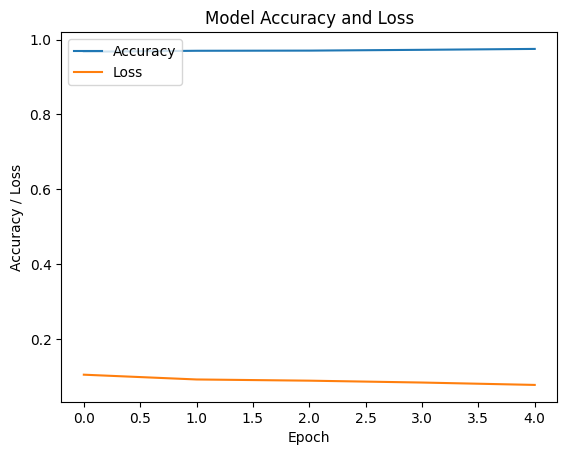

In [28]:
NN = keras.models.Sequential()
NN.add(keras.layers.Embedding(vocabSize, 300, weights=[embedding_matrix], input_length=1000, trainable=True))
NN.add(Conv1D(filters=32, kernel_size=4, padding='valid', activation='relu'))
NN.add(Dropout(0.5))
NN.add(MaxPooling1D())
NN.add(Conv1D(filters=32, kernel_size=6, padding='valid', activation='relu'))
NN.add(Dropout(0.5))
NN.add(MaxPooling1D())
NN.add(keras.layers.Flatten())
NN.add(keras.layers.Dense(10, activation='relu'))
NN.add(Dropout(0.5))
NN.add(keras.layers.Dense(1, activation='sigmoid'))
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
NN.fit(X_train, y_train, epochs=7, verbose=1)

# Define a callback to store training history
history = NN.fit(X_train, y_train, epochs=5, verbose=1, callbacks=[keras.callbacks.History()])

# Plot training history (accuracy and loss)
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [29]:
import keras

# Assuming X_train and y_train are already defined
# Define your model
NN = keras.models.Sequential()
NN.add(keras.layers.Embedding(vocabSize, 300, weights=[embedding_matrix], input_length=1000, trainable=True))
NN.add(keras.layers.Conv1D(filters=32, kernel_size=4, padding='valid', activation='relu'))
NN.add(keras.layers.Dropout(0.5))
NN.add(keras.layers.MaxPooling1D())
NN.add(keras.layers.Conv1D(filters=32, kernel_size=6, padding='valid', activation='relu'))
NN.add(keras.layers.Dropout(0.5))
NN.add(keras.layers.MaxPooling1D())
NN.add(keras.layers.Flatten())
NN.add(keras.layers.Dense(10, activation='relu'))
NN.add(keras.layers.Dropout(0.5))
NN.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Fit the model
history = NN.fit(X_train, y_train, epochs=7, verbose=1)

# Print accuracy and loss
loss, accuracy = NN.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))


Epoch 1/7
353/353 [==============================] - 149s 417ms/step - loss: 0.5246 - acc: 0.6979
Epoch 2/7
353/353 [==============================] - 137s 387ms/step - loss: 0.2495 - acc: 0.9256
Epoch 3/7
353/353 [==============================] - 139s 392ms/step - loss: 0.2087 - acc: 0.9432
Epoch 4/7
353/353 [==============================] - 141s 400ms/step - loss: 0.1824 - acc: 0.9476
Epoch 5/7
353/353 [==============================] - 143s 405ms/step - loss: 0.1526 - acc: 0.9592
Epoch 6/7
353/353 [==============================] - 138s 390ms/step - loss: 0.1383 - acc: 0.9614
Epoch 7/7
353/353 [==============================] - 143s 405ms/step - loss: 0.1239 - acc: 0.9616
Training Accuracy: 0.9714
Training Loss: 0.0769


174/174 [==============================] - 15s 86ms/step


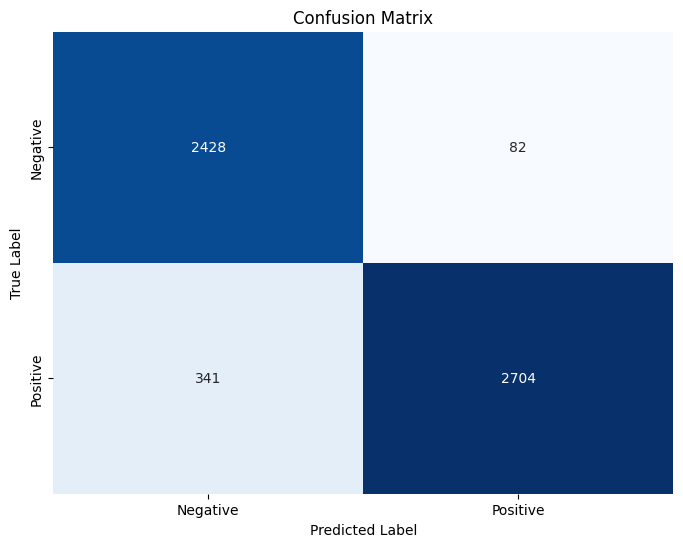

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming NN is already trained and you have X_test and y_test prepared

# Obtain predictions from the model
predictions = NN.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32').flatten()  # Assuming a threshold of 0.5 and flattening

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()


In [31]:
from sklearn.metrics import classification_report

# Assuming NN is already trained and you have X_test and y_test prepared

# Obtain predictions from the model
predictions = NN.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32').flatten()  # Assuming a threshold of 0.5 and flattening

# Generate classification report
report = classification_report(y_test, predicted_classes, target_names=['0', '1'])
print(report)


174/174 [==============================] - 15s 87ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2510
           1       0.97      0.89      0.93      3045

    accuracy                           0.92      5555
   macro avg       0.92      0.93      0.92      5555
weighted avg       0.93      0.92      0.92      5555



174/174 [==============================] - 17s 97ms/step


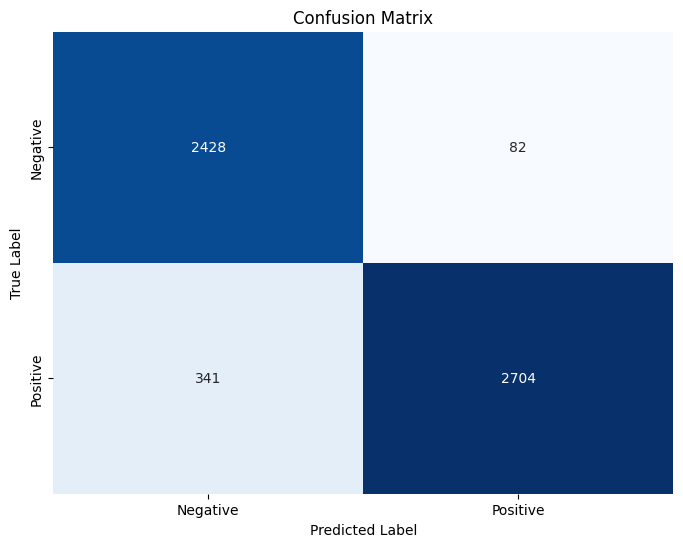

Matthews Correlation Coefficient: 0.851371668637272


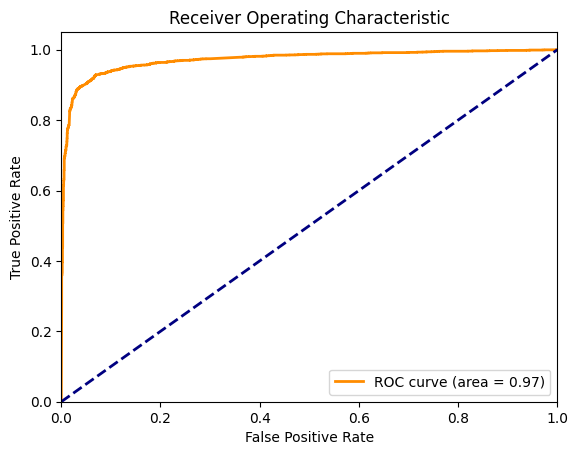

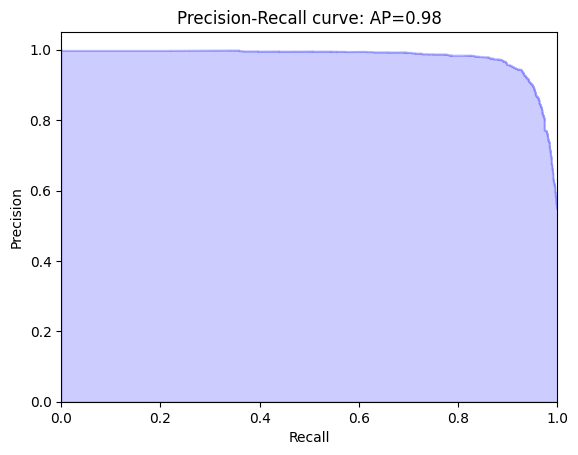

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, matthews_corrcoef

# Assuming NN is already trained and you have X_test and y_test prepared
predictions = NN.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32').flatten()  # Assuming a threshold of 0.5 and flattening

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, predicted_classes)
print("Matthews Correlation Coefficient:", mcc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, predictions)
average_precision = average_precision_score(y_test, predictions)

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


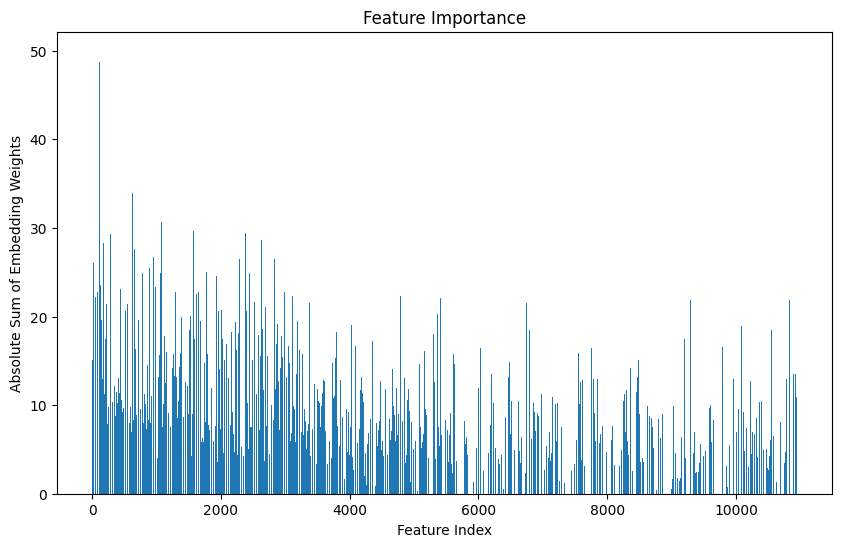

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model1 and embedding_weights are defined
embedding_weights = NN.layers[0].get_weights()[0]

# Calculate the absolute sum of embedding weights for each feature
feature_importance = np.sum(np.abs(embedding_weights), axis=1)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Sum of Embedding Weights')
plt.title('Feature Importance')
plt.show()
